In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind_from_stats
from scipy.special import logit, expit
from sklearn.metrics import auc,roc_curve,roc_auc_score, precision_recall_curve, average_precision_score, auc, balanced_accuracy_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_sqclvfux.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Preallocating 10619/11178 Mb (0.950000) on cuda
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:1A:00.0)


In [2]:
classification_model = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/classification_model_4.hdf5", compile = False)

WARNING (theano.gof.cmodule): The same cache key is associated to different modules (/home/eramamur/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-centos-7.4.1708-Core-x86_64-3.6.7-64/tmp3u1bc4lx and /home/eramamur/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-centos-7.4.1708-Core-x86_64-3.6.7-64/tmpotib99zd). This is not supposed to happen! You may need to manually delete your cache directory to fix this.


In [6]:
def evaluate_model(X,Y,model, prefix):
    pred = model.predict_proba(X)
    
    fpr, tpr, thresholds = roc_curve(Y, pred, pos_label=1)
    auRoc = auc(fpr, tpr)

    precision, recall, thresholds = precision_recall_curve(Y,pred)
    auPrc = auc(recall, precision)
    averagePrecision = average_precision_score(Y, pred)
    pred_binary = pred>0.5
    balancedAccuracy = balanced_accuracy_score(Y, pred_binary)
    
    negativeClassTrue = []
    negativeClassPred = []
    positiveClassTrue = []
    positiveClassPred = []
    
    for i, val in enumerate(Y):
        currTrueLabel = Y[i]
        currPred = pred_binary[i]
        if currTrueLabel == 0:
            negativeClassTrue.append(currTrueLabel)
            negativeClassPred.append(currPred)
        else:
            positiveClassTrue.append(currTrueLabel)
            positiveClassPred.append(currPred)            

            
    negativeClassTrue = np.array(negativeClassTrue)
    negativeClassPred = np.array(negativeClassPred)
    positiveClassTrue = np.array(positiveClassTrue)
    positiveClassPred = np.array(positiveClassPred)
    
    negativeAccuracy = accuracy_score(negativeClassTrue, negativeClassPred)
    positiveAccuracy = accuracy_score(positiveClassTrue, positiveClassPred)
    
    print("auROC:",auRoc)
    print("Average precision:",averagePrecision)
    print("auPRC:",auPrc)
    print("Balanced Accuracy:",balancedAccuracy)
    print("Positive Accuracy:",positiveAccuracy)
    print("Negative Accuracy:",negativeAccuracy)
    print("Classification Report:")
    print(classification_report(Y, pred_binary))
    
    plt.figure()

    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title("ROC (AUC: " +str(round(auRoc,2))+")")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig(prefix+"_roc.svg")
    plt.savefig(prefix+"_roc.png")

    
    plt.figure()    
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.title("Precision-Recall (AUC: " +str(round(auPrc,2))+")")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.savefig(prefix+"_prc.svg")
    plt.savefig(prefix+"_prc.png")

In [4]:
#X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chrs_training_summit_centered_training_set_classification_X.npy')
#Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chrs_training_summit_centered_training_set_classification_Y.npy')
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr4_summit_centered_validation_set_classification_X.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_monocyte/chr4_summit_centered_validation_set_classification_Y.npy')

auROC: 0.9752227473025782
Average precision: 0.9799205911157891
auPRC: 0.9799170353112591
Balanced Accuracy: 0.920599714829538
Positive Accuracy: 0.9378736122971819
Negative Accuracy: 0.903325817361894
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      3548
         1.0       0.93      0.94      0.93      4684

   micro avg       0.92      0.92      0.92      8232
   macro avg       0.92      0.92      0.92      8232
weighted avg       0.92      0.92      0.92      8232



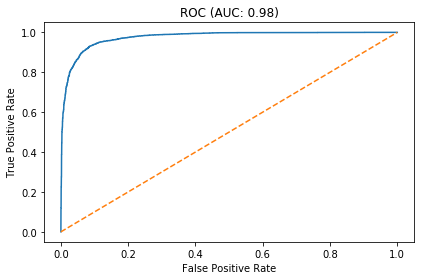

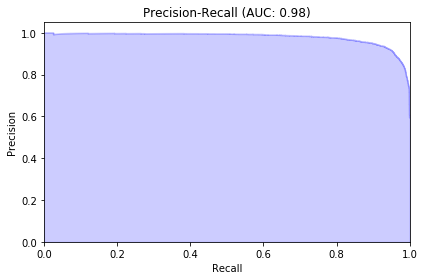

In [7]:
evaluate_model(X_valid,Y_valid,classification_model, "monocyte_validation")

In [ ]:
#evaluate_model(X_train,Y_train,classification_model, "monocyte_training")